In [12]:
!pip install scikit-learn pandas matplotlib seaborn

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

시즌별 팀 성적 지표:

Wins, Draws, Losses: 경기 결과, Goals_For, Goals_Against: 득점/실점, xG, xGA: 기대 득점 / 기대 실점, 총 15개의 시즌 데이터를 사용 (토트넘 전용)

In [14]:
# 샘플 데이터 정의 (2010~2024 시즌 토트넘 기준)
data = {
    "Season": list(range(2010, 2025)),
    "Points": [70, 62, 66, 69, 64, 70, 71, 77, 86, 71, 59, 62, 61, 60, 68],
    "Wins": [21, 18, 20, 21, 19, 20, 21, 23, 26, 21, 16, 18, 17, 18, 20],
    "Draws": [7, 8, 6, 6, 7, 10, 9, 8, 8, 8, 11, 8, 10, 6, 8],
    "Losses": [10, 12, 12, 11, 12, 8, 8, 7, 4, 9, 11, 12, 11, 14, 10],
    "Goals_For": [67, 66, 66, 66, 58, 69, 74, 86, 86, 67, 61, 68, 69, 70, 71],
    "Goals_Against": [46, 50, 48, 46, 45, 35, 40, 37, 28, 39, 47, 45, 44, 55, 51],
    "xG": [60.5, 61.0, 62.3, 63.1, 59.8, 68.0, 70.2, 85.0, 87.5, 66.3, 60.1, 65.4, 66.7, 67.2, 68.9],
    "xGA": [44.2, 47.3, 45.6, 44.9, 43.5, 34.1, 38.7, 36.8, 26.9, 37.5, 46.2, 44.7, 43.9, 52.8, 49.3]
}
df = pd.DataFrame(data)

In [15]:
# 독립변수와 타겟 분리
X = df.drop(columns=["Season", "Points"])
y = df["Points"]

In [16]:
#  데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# 예측 및 평가
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.3f}")


📊 MAE: 0.21
📊 RMSE: 0.31
📊 R² Score: 0.994


R² Score가 1에 가까울수록 좋은 모델

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

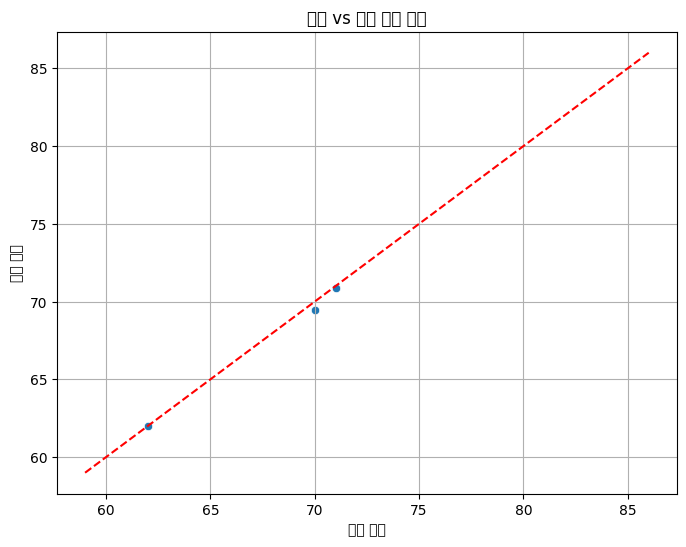

In [19]:
# 한글 폰트 설정 (한 번만 실행하면 됨)
!apt-get update -qq
!apt-get install -y fonts-nanum > /dev/null
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 📊 예측 vs 실제 승점 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("실제 승점")
plt.ylabel("예측 승점")
plt.title("실제 vs 예측 승점 비교")
plt.grid()
plt.show()


X축: 실제 시즌 승점 (타겟값)

Y축: 모델이 예측한 승점

점(●): 각 시즌(샘플)별 실제값과 예측값을 나타냄

붉은 점선(---): 이상적인 예측선 (예측 = 실제), 즉 완벽한 예측일 경우 모든 점이 이 선 위에 위치함

점들이 빨간 점선에 가까울수록 예측이 정확함을 의미함

예측된 승점이 85~95점 이상이면 우승 가능성 높음으로 간접 해석 가능




